In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import poly1d, polyfit, power
import scipy.optimize
from math import *
from IPython.display import HTML
from IPython.display import Image
import os
import pandas as pd
import PIL as pil
import heapq
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 14
# import seaborn as sns
# sns.set_palette("deep", desat=.6)

try:
    from PIL import Image
except:
    import Image
    
incl = 30.

sin_i2 = np.sin(incl*np.pi/180.)**2
cos_i2 = np.cos(incl*np.pi/180.)**2

[]

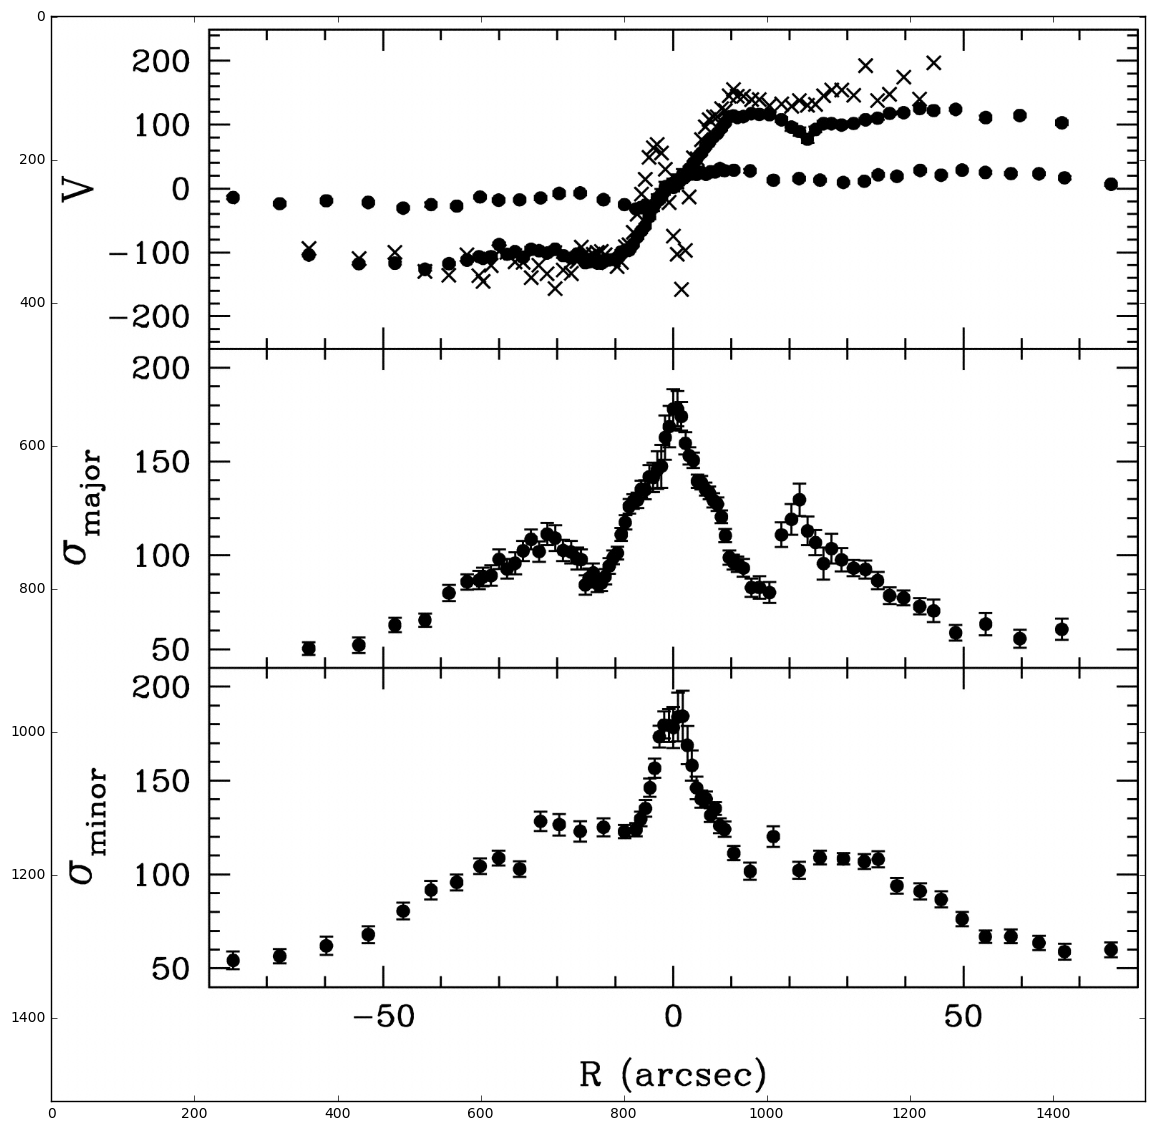

In [2]:
os.chdir("C:\\science\\2FInstability\\data\\ngc1068")

plt.imshow(np.asarray(Image.open("shapiro_fg3a.png")))
plt.plot()

[]

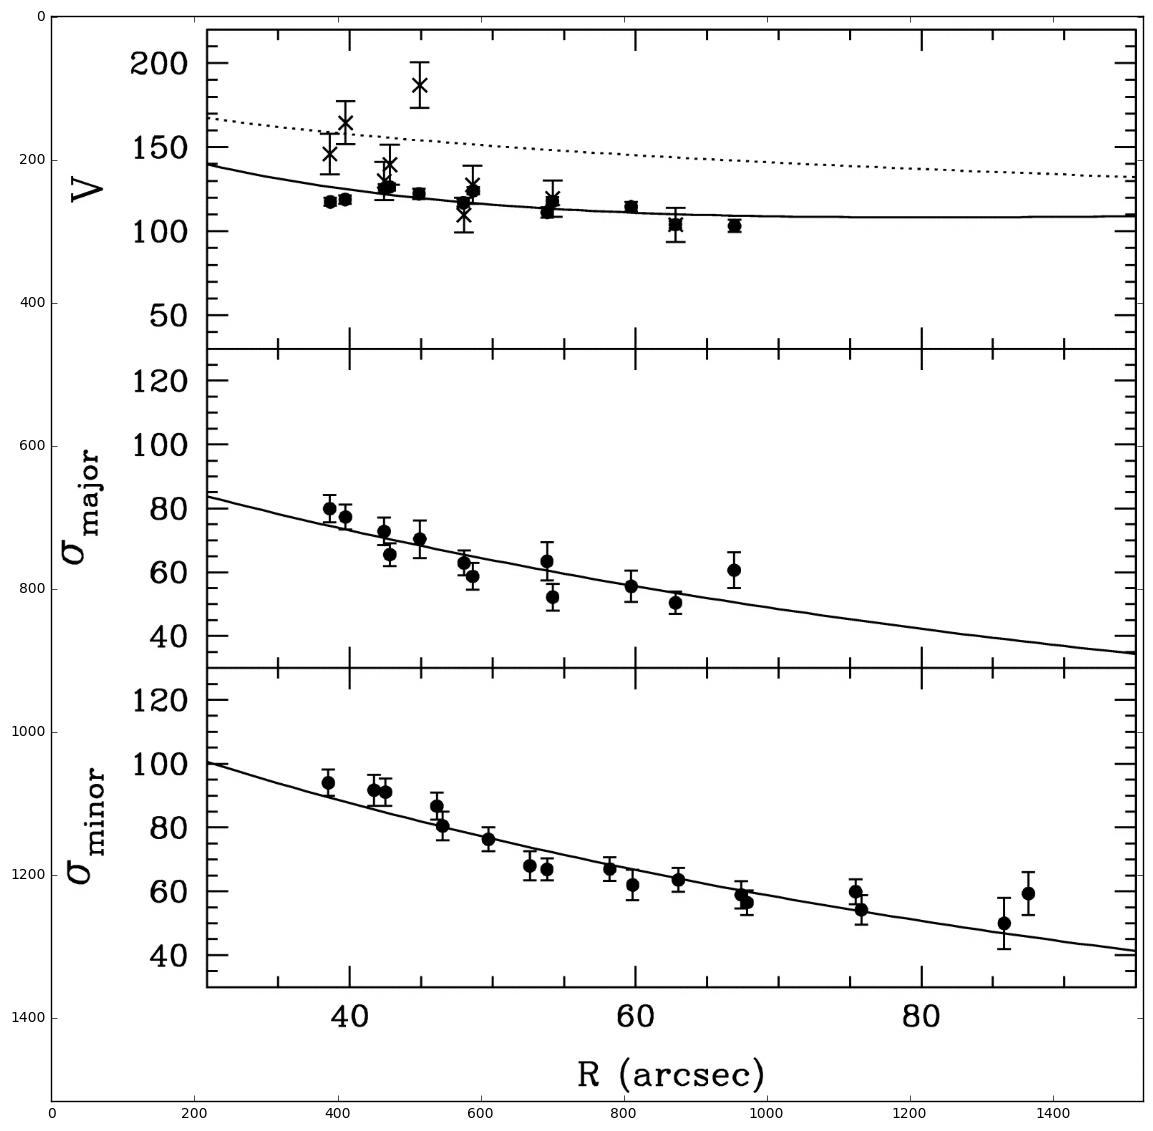

In [3]:
plt.imshow(np.asarray(Image.open("shapiro_fg4a.png")))
plt.plot()

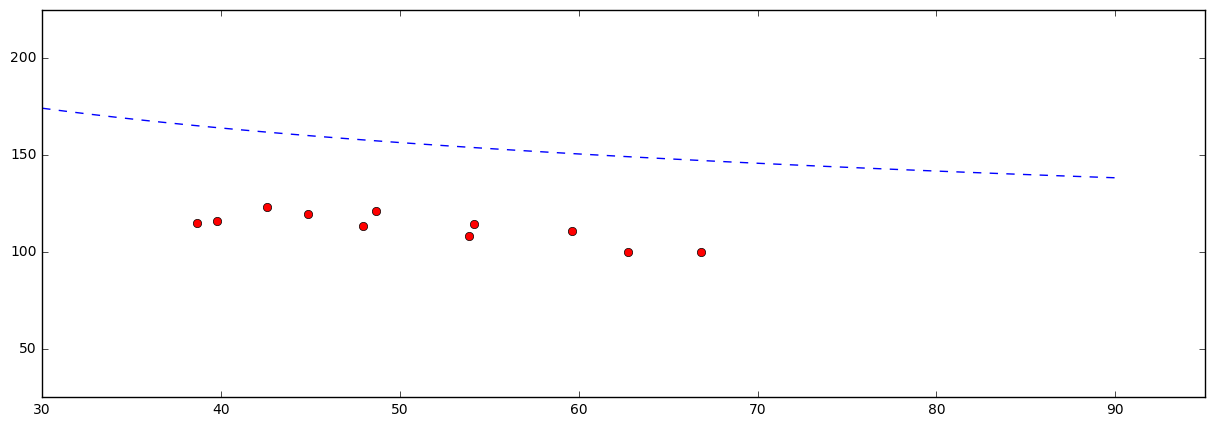

In [4]:
pylab.rcParams['figure.figsize'] = 15, 5

#Velocity
lu = (215, 67)
lu_val = (30, 200)
rd = (1217, 463)
rd_val = (80, 25)

data = [(389,259), (411,257), (467,241), (513,249), (575,263), (589,245), (693,275), (699,261), (809,269), (871,293), (953,293)]

def extend_values(data, lu, lu_val, rd, rd_val):
    xscale = 1.0*(rd_val[0]-lu_val[0])/(rd[0]-lu[0])
    yscale = 1.0*(rd_val[1]-lu_val[1])/(lu[1]-rd[1])
    extended = []
    for d in data:
        extended.append((xscale*(d[0]-lu[0])+lu_val[0], yscale*(rd[1] - d[1])+rd_val[1]))
    return extended
        
e_data = extend_values(data, lu, lu_val, rd, rd_val)
plt.plot(zip(*e_data)[0],zip(*e_data)[1], 'or')

vel_fit = lambda l: 356.*np.power(l, -0.21)
plt.plot(np.linspace(30., 90., 100), map(vel_fit, np.linspace(30., 90., 100)), '--')
plt.ylim(25, 225)
plt.xlim(30, 95)
plt.show()

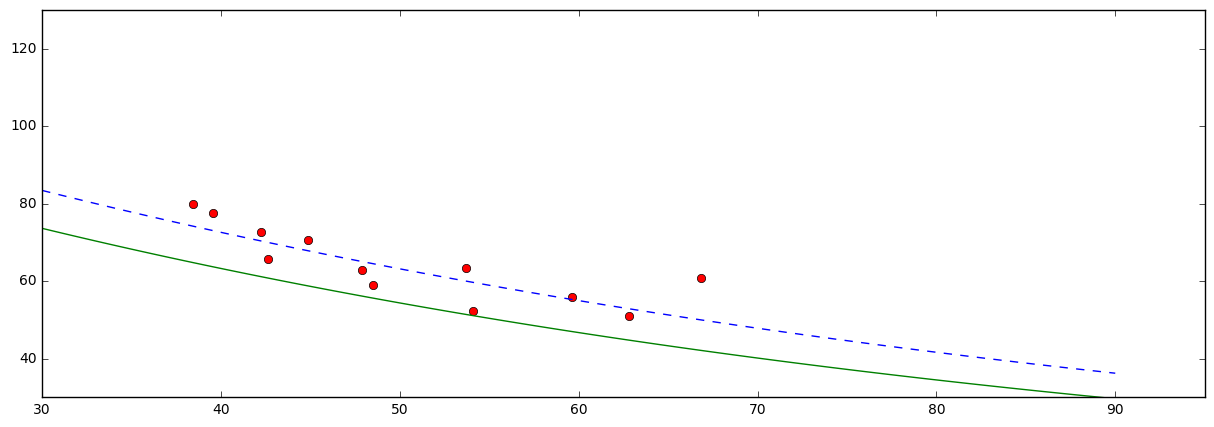

In [5]:
#Sig_maj
lu = (219, 509)
lu_val = (30, 120)
rd = (1215, 913)
rd_val = (80, 30)

data = [(387,689), (409,699), (463,721), (471,753), (515,731), (575,765), (587,783), (691,763), (699,813), (809,797), (873,819), (953,775)]

sig_maj_data = extend_values(data, lu, lu_val, rd, rd_val)
plt.plot(zip(*sig_maj_data)[0],zip(*sig_maj_data)[1], 'or')

sigR = lambda l: 213.*np.exp(-l/72.)
sigZ = lambda l: 124.*np.exp(-l/72.)
phi_to_R = lambda l: 0.5*(1 - 0.21)

sigR_min = lambda l: 193.*np.exp(-l/66.)
sigZ_min = lambda l: 115.*np.exp(-l/66.)
phi_to_R_min = lambda l: 0.5*(1 - 0.24)

sig_maj = lambda l: sqrt(sigR(l)**2 * (phi_to_R(l) * sin_i2 + sigZ(l)**2 * cos_i2/sigR(l)**2))
sig_maj_min = lambda l: sqrt(sigR_min(l)**2 * (phi_to_R_min(l) * sin_i2 + sigZ_min(l)**2 * cos_i2/sigR_min(l)**2))

plt.plot(np.linspace(30., 90., 100), map(sig_maj, np.linspace(30., 90., 100)), '--')
plt.plot(np.linspace(30., 90., 100), map(sig_maj_min, np.linspace(30., 90., 100)), '-')
plt.ylim(30, 130)
plt.xlim(30, 95)
plt.show()

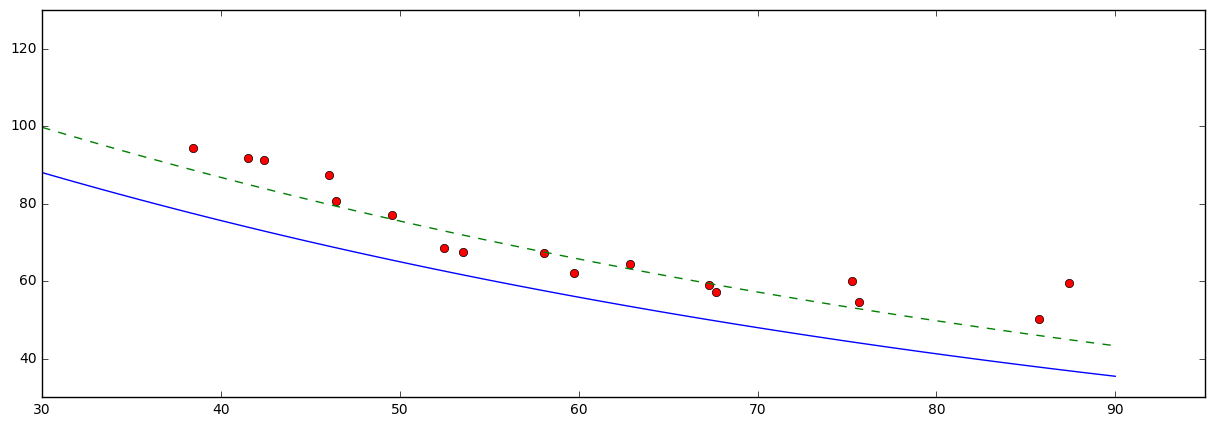

In [6]:
#Sig_min
lu = (219, 957)
lu_val = (30, 120)
rd = (1217, 1359)
rd_val = (80, 30)

data = [(387,1071), (449,1083), (467,1085), (539,1103), (547,1133), (609,1149), (667,1187), (689,1191), (779,1193), (813,1215), 
        (875,1205), (963,1229), (971,1237), (1123,1225), (1131,1249), (1331,1269), (1365,1227)]

sig_min_data = extend_values(data, lu, lu_val, rd, rd_val)
plt.plot(zip(*sig_min_data)[0], zip(*sig_min_data)[1], 'or')

sig_min = lambda l: sqrt(sigR(l)**2 * sin_i2 + sigZ(l)**2 * cos_i2)
sig_min_min = lambda l: sqrt(sigR_min(l)**2 * sin_i2 + sigZ_min(l)**2 * cos_i2)

plt.plot(np.linspace(30., 90., 100), map(sig_min_min, np.linspace(30., 90., 100)), '-')
plt.plot(np.linspace(30., 90., 100), map(sig_min, np.linspace(30., 90., 100)), '--')
plt.ylim(30, 130)
plt.xlim(30, 95)
plt.show()

Картинка сравнения нашего приближения с Герсеновским:

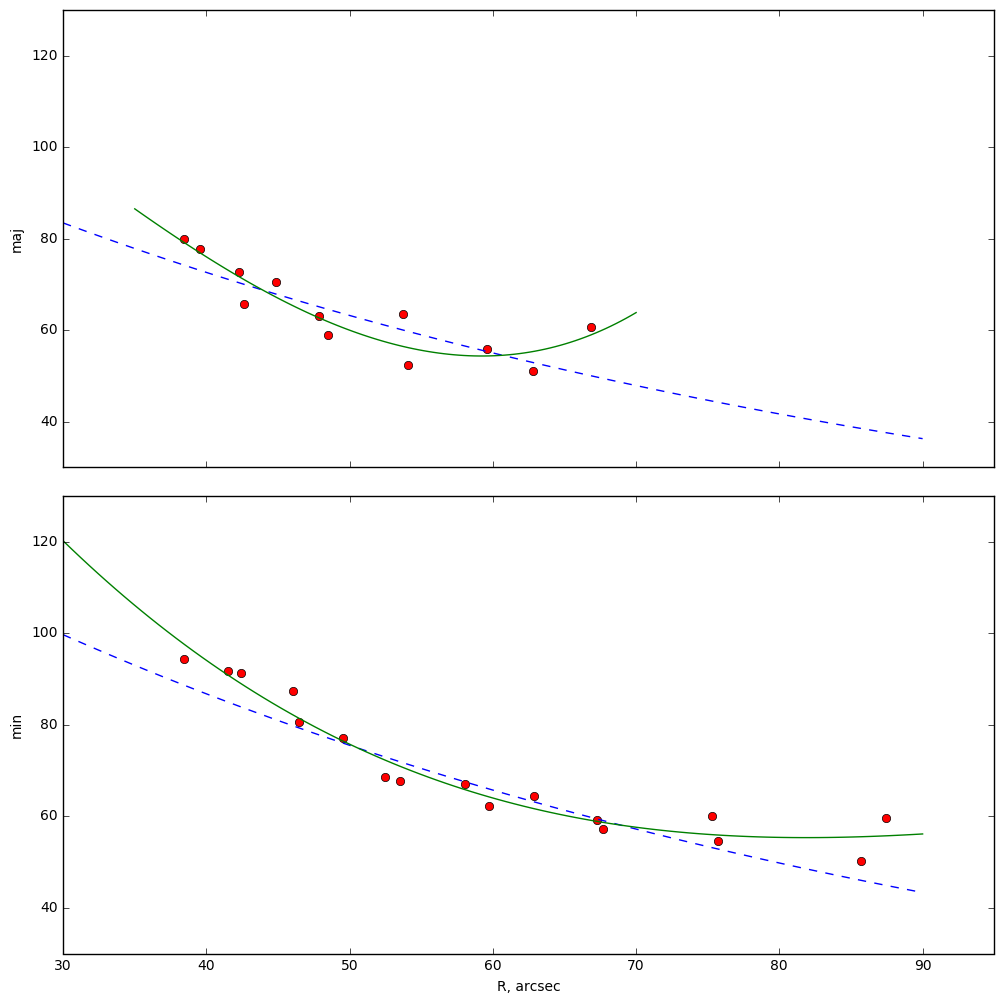

In [7]:
import scipy.interpolate as inter

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[10, 10], sharex=True)
fig.tight_layout()

radii_maj, sig_maj_p = zip(*sig_maj_data)
spl_maj = inter.UnivariateSpline(radii_maj, sig_maj_p, k=3, s=10000)
radii_min, sig_min_p = zip(*sig_min_data)
spl_min = inter.UnivariateSpline(radii_min, sig_min_p, k=3, s=10000)

sigR = lambda l: 213.*np.exp(-l/72.)
sigZ = lambda l: 124.*np.exp(-l/72.)
phi2_to_R2 = lambda l: 0.5*(1 - 0.21)

sig_maj = lambda l: sigR(l)*sqrt(phi2_to_R2(l) * sin_i2 + (124./213.)**2 * cos_i2)
sig_min = lambda l: sqrt(sigR(l)**2 * sin_i2 + sigZ(l)**2 * cos_i2)

ax1.plot(zip(*sig_maj_data)[0],zip(*sig_maj_data)[1], 'or')
ax1.set_xlim(30, 95)
ax1.set_ylim(30, 130)
ax1.set_ylabel('maj')
ax1.plot(np.linspace(30., 90., 100), map(sig_maj, np.linspace(30., 90., 100)), '--')
ax1.plot(np.linspace(35., 70., 100), map(spl_maj, np.linspace(35., 70., 100)), '-')

ax2.plot(zip(*sig_min_data)[0],zip(*sig_min_data)[1], 'or')
ax2.set_ylim(30, 130)
ax2.set_ylabel('min')
ax2.set_xlabel('R, arcsec')
ax2.plot(np.linspace(30., 90., 100), map(sig_min, np.linspace(30., 90., 100)), '--')
ax2.plot(np.linspace(30., 90., 100), map(spl_min, np.linspace(30., 90., 100)), '-')

plt.show()

In [8]:
h_kin = 72.
beta = 0.21

def sig_maj_exp(R):
    global alpha, sigR_0, h_kin, beta
    return np.exp(-R/h_kin)*sigR_0*sqrt(0.5*(1 - beta) * sin_i2 + alpha**2 * cos_i2)

def sig_min_exp(R):
    global alpha, sigR_0, h_kin
    return np.exp(-R/h_kin)*sigR_0*sqrt(sin_i2 + alpha**2 * cos_i2)

alphas = np.arange(0.25, 1., 0.01)
sigmas = np.arange(80.0, 250, 0.25)

def compute_chi2_maps(alph=(), sigm=()):
    '''Вычисляем все изображения, чтобы потом только настройки менять'''
    image_min = np.random.uniform(size=(len(sigm), len(alph)))
    image_maj = np.random.uniform(size=(len(sigm), len(alph)))
    image = np.random.uniform(size=(len(sigmas), len(alphas)))
    for i,si in enumerate(sigm):
        for j,al in enumerate(alph):
            global alpha, sigR_0
            alpha = al
            sigR_0 = si
            sqerr_maj = sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data)
            sqerr_min = sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data)
            image_maj[i][j] = sqerr_maj
            image_min[i][j] = sqerr_min
    return image_maj, image_min

pics_path = "C:\\science\\2FInstability\\data\\ngc1068\\"
if not os.path.exists(pics_path):
    os.makedirs(pics_path)
if os.path.isfile(pics_path + 'chi2_map_maj.npy'):
    image_maj = np.load(pics_path + "chi2_map_maj.npy")
    image_min = np.load(pics_path + "chi2_map_min.npy")
else:
    image_maj, image_min = compute_chi2_maps(alph=alphas, sigm=sigmas)
    np.save(pics_path + 'chi2_map_maj', image_maj)
    np.save(pics_path + 'chi2_map_min', image_min)

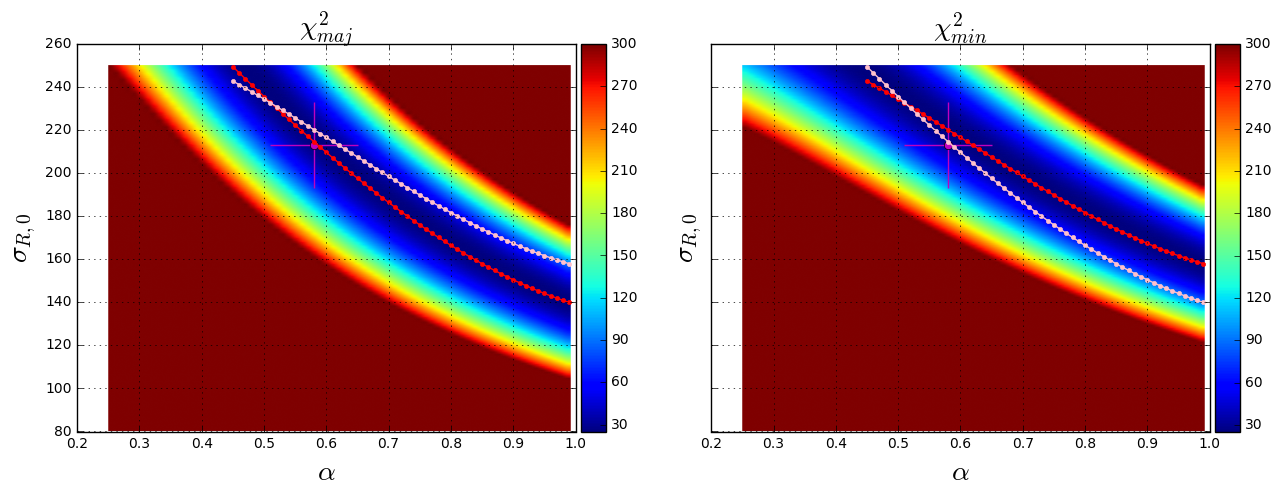

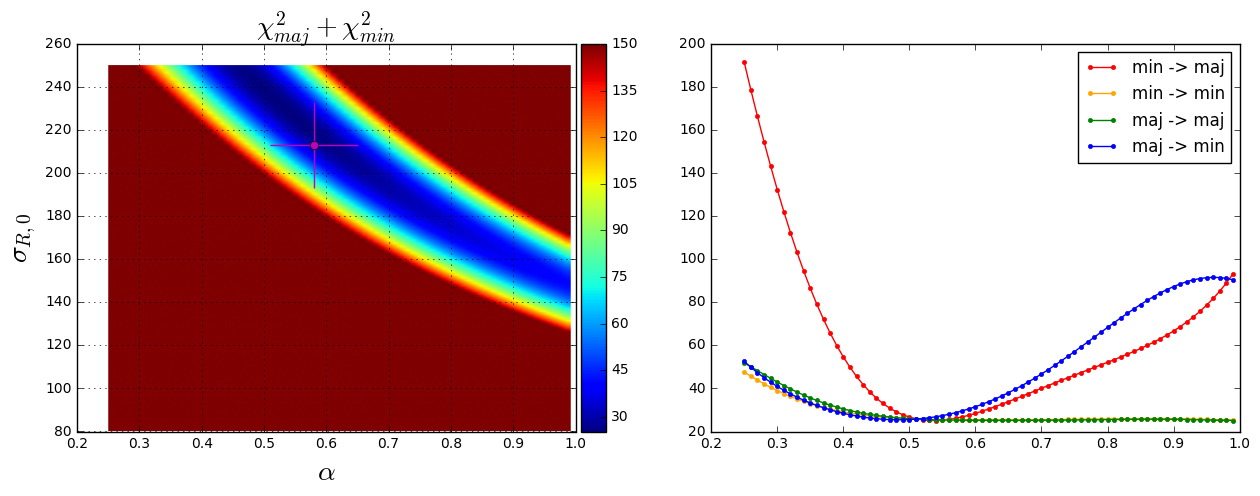

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_chi2_map(image, ax, log_scale=False, title='$\chi^2$', is_contour=False, vmax=0.):
    if image is not None:
        im = ax.imshow(image, cmap='jet', vmin=image.min(), vmax=vmax, interpolation='spline16', 
                   origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        ax.set_title(title, size=20.)
        ax.set_ylabel('$\sigma_{R,0}$', size=20.)
        ax.set_xlabel(r'$\alpha$', size=20.)
        ax.grid(True)
        
min_sigmas = np.where(image_min < image_min.min() + 10.)
slice_alph, slice_sig = min_sigmas[1], min_sigmas[0]
slice_alph = map(lambda l: alphas[0] + (alphas[-1] - alphas[0])*l/len(image_min[0]) , slice_alph)
slice_sig = map(lambda l: sigmas[0] + (sigmas[-1] - sigmas[0])*l/len(image_min), slice_sig)
poly_slice_min = poly1d(polyfit(slice_alph, slice_sig, deg=3))
maj_sigmas = np.where(image_maj < image_maj.min() + 10.)
slice_alph, slice_sig = maj_sigmas[1], maj_sigmas[0]
slice_alph = map(lambda l: alphas[0] + (alphas[-1] - alphas[0])*l/len(image_maj[0]) , slice_alph)
slice_sig = map(lambda l: sigmas[0] + (sigmas[-1] - sigmas[0])*l/len(image_maj), slice_sig)
poly_slice_maj = poly1d(polyfit(slice_alph, slice_sig, deg=3))
       
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=[15,5])
plot_chi2_map(image_maj, axes[0], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=300.)
plot_chi2_map(image_min, axes[1], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=300.)
axes[0].plot(0.58, 213., 'o', color='m')
axes[0].errorbar(0.58, 213., xerr=0.07, yerr=20., fmt='.', marker='.', mew=0, color='m')
axes[0].plot(alphas[20:], map(poly_slice_maj, alphas[20:]), '.-', label = 'maj -> maj', color= 'red')
axes[0].plot(alphas[20:], map(poly_slice_min, alphas[20:]), '.-', label = 'min -> maj', color= 'pink')
axes[1].plot(0.58, 213., 'o', color='m')
axes[1].errorbar(0.58, 213., xerr=0.07, yerr=20., fmt='.', marker='.', mew=0, color='m')
axes[1].plot(alphas[20:], map(poly_slice_min, alphas[20:]), '.-', label = 'min -> min', color='red')
axes[1].plot(alphas[20:], map(poly_slice_maj, alphas[20:]), '.-', label = 'maj -> min', color='pink') 
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=[15,5])
plot_chi2_map((image_min + image_maj)/2, axes[0], log_scale=False, title='$\chi^2_{maj}+\chi^2_{min}$', is_contour=False, vmax=150.)
axes[0].plot(0.58, 213., 'o', color='m')
axes[0].errorbar(0.58, 213., xerr=0.07, yerr=20., fmt='.', marker='.', mew=0, color='m')

err_maj_1, err_maj_2 = [], []
err_min_1, err_min_2 = [], []
for al in alphas:
    global alpha, sigR_0
    alpha = al
    sigR_0 = poly_slice_min(alpha)
    err_maj_1.append(sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data))
    err_min_1.append(sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data))
    sigR_0 = poly_slice_maj(alpha)
    err_maj_2.append(sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data))
    err_min_2.append(sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data))
    
axes[1].plot(alphas, err_maj_1, '.-', label = 'min -> maj', color= 'red')
axes[1].plot(alphas, err_min_1, '.-', label = 'min -> min', color='orange')
axes[1].plot(alphas, err_maj_2, '.-', label = 'maj -> maj', color= 'green')
axes[1].plot(alphas, err_min_2, '.-', label = 'maj -> min', color='blue') 
axes[1].legend()

plt.show()

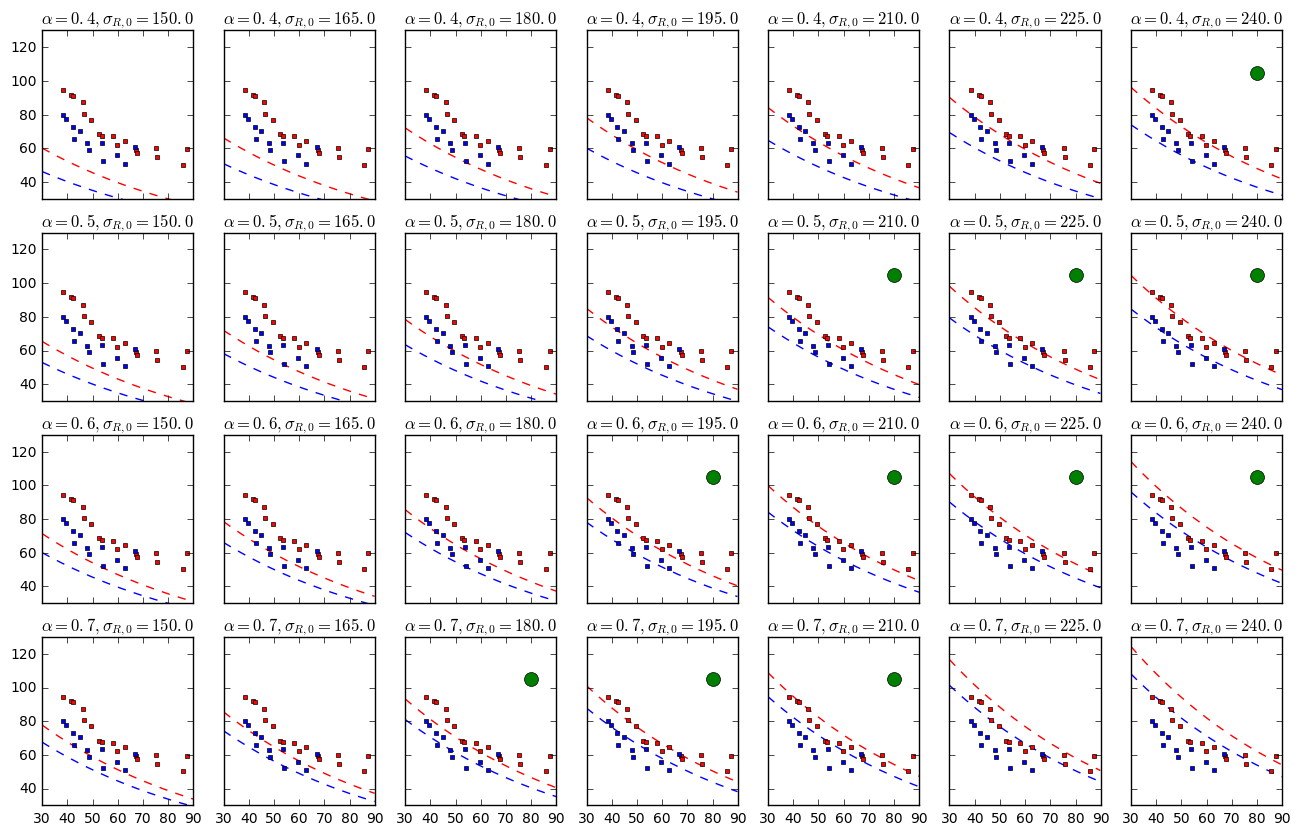

In [10]:
alphas = np.arange(0.4, 0.8, 0.1)
sigmas = np.arange(150., 250., 15.)
points = np.arange(30., 90., 0.1)
good_pics = []

def plot_ranges_gers(sigmas_range, alphas_range, good_pics=[], calc_chi=False, best_err=3):
    nrows = alphas.size
    ncols = sigmas.size
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=[16,10])
    plt_index = 0
    # Последнее - среднее геометрическое
    sqerr_majs, sqerr_mins, sqerr_mean = [],[],[]
    for al in alphas_range:
        for si in sigmas_range:
            global alpha, sigR_0
            alpha = al
            sigR_0 = si
            ax = axes[plt_index/ncols, plt_index % ncols]
            ax.set_title(r'$\alpha = %s, \sigma_{R,0}=%s$' % (al,si))
            
            sqerr_maj = sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data)
            sqerr_min = sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data)
            if sqerr_maj < 120. and sqerr_min < 120.:
                ax.plot(80., 105., 'og', ms = 10)
            
            ax.plot(points, [sig_maj_exp(R) for R in points], '--', color='blue')
            ax.plot(points, [sig_min_exp(R) for R in points], '--', color='red')
            ax.plot(zip(*sig_min_data)[0],zip(*sig_min_data)[1], 's', color='red', ms=3)
            ax.plot(zip(*sig_maj_data)[0],zip(*sig_maj_data)[1], 's', color='blue', ms=3)
            ax.set_ylim(30, 130)
            ax.set_xlim(30, 90)
            plt_index = plt_index + 1
    

plot_ranges_gers(sigmas, alphas, good_pics=good_pics, calc_chi=True)
plt.show()

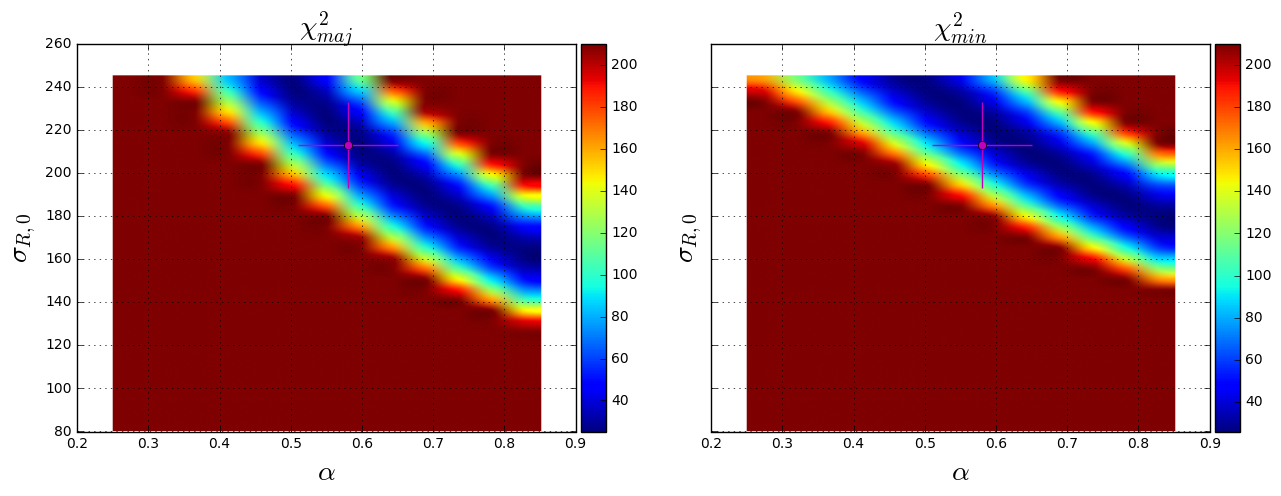

In [11]:
from IPython.html.widgets import *

def widget_plot_maps(h_k, b, vm, contour_swap):
    global alpha, sigR_0, h_kin, beta, alphas, sigmas
    h_kin = h_k
    beta = b
    alphas = np.arange(0.25, 0.9, 0.05)
    sigmas = np.arange(80.0, 250, 5.)
    image_maj, image_min = compute_chi2_maps(alph=alphas, sigm=sigmas)    
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=[15,5])
    plot_chi2_map(image_maj, axes[0], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=vm)
    plot_chi2_map(image_min, axes[1], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=vm)
    
    if contour_swap:
        norm = cm.colors.Normalize(vmax=image_min.max(), vmin=-image_min.max())
        cmap = cm.PRGn
        levels = np.linspace(start=image_min.min(), stop=vm, num=10)
        cset=axes[0].contour(image_min, levels, hold='on', colors = 'k', origin='lower', 
                             extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
        norm = cm.colors.Normalize(vmax=image_maj.max(), vmin=-image_maj.max())
        cmap = cm.PRGn
        levels = np.linspace(start=image_maj.min(), stop=vm, num=10)
        cset=axes[1].contour(image_maj, levels, hold='on', colors = 'k', origin='lower', 
                             extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
    
    axes[0].plot(0.58, 213., 'o', color='m')
    axes[0].errorbar(0.58, 213., xerr=0.07, yerr=20., fmt='.', marker='.', mew=0, color='m')
    axes[1].plot(0.58, 213., 'o', color='m')
    axes[1].errorbar(0.58, 213., xerr=0.07, yerr=20., fmt='.', marker='.', mew=0, color='m')
    plt.show()

interact(widget_plot_maps, h_k=(60, 80, 0.5), b=(0.15, 0.25, 0.01), vm = (70., 350., 10),  contour_swap=False);

#Выше был пример построения на основе данных Герсена и Шапиро и их аппроксимаций. Ниже попробуем использовать наш подход:

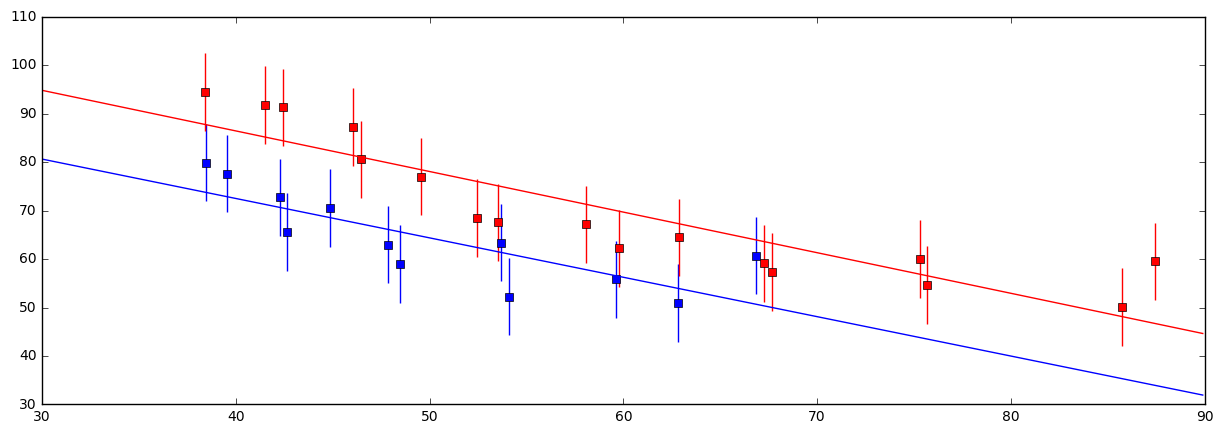

In [12]:
import scipy.interpolate as inter

radii_maj, sig_maj_p = zip(*sig_maj_data)
e_sig_maj_p = [8]*len(radii_maj)
spl_maj = inter.UnivariateSpline (radii_maj[::-1], sig_maj_p[::-1], k=1, s=10000)

radii_min, sig_min_p = zip(*sig_min_data)
e_sig_min_p = [8]*len(radii_min)
spl_min = inter.UnivariateSpline (radii_min[::-1], sig_min_p[::-1], k=1, s=10000)

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, spl_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, spl_min(points), label = '$\sigma_{los}^{min}\, splinefit$', color='red')

plt.show()

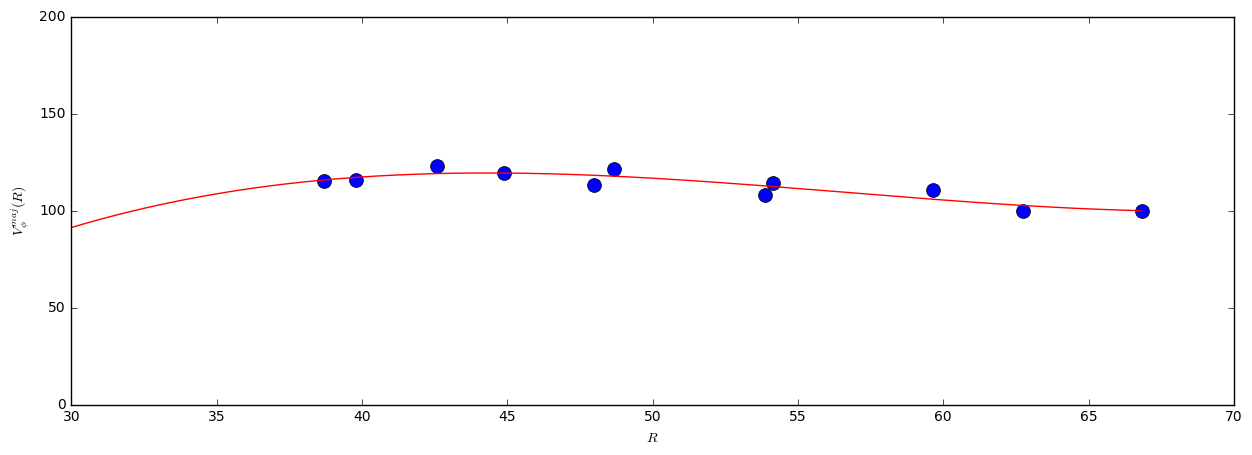

In [ ]:
from numpy import poly1d, polyfit, power

r_ma_b, vel_ma_b = zip(*e_data)
poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=3))

plt.plot(r_ma_b, vel_ma_b, 'o', color='blue', markersize=10)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, poly_star(test_points), '-', color='red')
plt.xlabel('$R$')
plt.ylim(0, 200)
plt.xlim(30, 70)
plt.ylabel('$V^{maj}_{\phi}(R)$')
plt.show()

In [ ]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*poly_star.deriv()(R) / poly_star(R))

test_points = np.arange(min(r_ma_b), max(r_ma_b), 0.1)

def f(R, Ro):
    return 0.5*(1 + np.exp( -R/Ro ))

xdata = test_points
ydata = sigPhi_to_sigR_real(xdata)

# xdata[0] = 0
# ydata[0] = 0

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, xdata, ydata, p0=[1.0])
Ro = popt[0]

plt.plot(xdata, ydata, 's', color='r')
plt.plot(xdata, [f(p, Ro) for p in xdata], '-', linewidth=3.0, color='b')
# plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.title('$R_{0} = %s $' % Ro)
plt.ylim(0, 1)
plt.show()

def sigPhi_to_sigR(R):
    return sqrt(f(R, Ro))

In [ ]:
#Значение sig_los_min в cutted
sig_min_0 = spl_min(radii_min[0])

#Значение sig_R в cutted
sig_R_0 = 100.

alpha = 0.5

def sigR_exp(R):
    return sig_R_0*spl_min(R)/sig_min_0

def sigZ_exp(R):
    return alpha * sigR_exp(R)

def sigPhi_exp(R):
    return sigPhi_to_sigR(R) * sigR_exp(R)

# def sig_maj_exp(R):
#     return sqrt(sigPhi_exp(R)**2 * sin(incl*pi/180)**2 + sigZ_exp(R)**2 * cos(incl*pi/180)**2)

# def sig_min_exp(R):
#     return sqrt(sigR_exp(R)**2 * sin(incl*pi/180)**2 + sigZ_exp(R)**2 * cos(incl*pi/180)**2)


cos_i, sin_i = cos(incl * pi / 180), sin(incl * pi / 180)

def sig_maj_exp(R):
    return sig_R_0*spl_min(R)/sig_min_0 * sqrt(sigPhi_to_sigR_real(R) * sin_i**2 + alpha**2 * cos_i**2)
#     return sig_R_0*spl_min(R)/sig_min_0 * sqrt(sigPhi_to_sigR(R) * sin_i**2 + alpha**2 * cos_i**2)
#     return sqrt(sigPhi_exp(R)**2 * sin(incl*pi/180)**2 + sigZ_exp(R)**2 * cos(incl*pi/180)**2)

def sig_min_exp(R):
    return sig_R_0*spl_min(R)/sig_min_0 * sqrt(sin_i**2 + alpha**2 * cos_i**2)
#     return sqrt(sigR_exp(R)**2 * sin(incl*pi/180)**2 + sigZ_exp(R)**2 * cos(incl*pi/180)**2)

In [16]:
alphas = np.arange(0.25, 1., 0.01)
sigmas = np.arange(50.0, 200, 1.)

def calc_chi2_normal(obs, obserr, predicted):
    return sum([(o-p)**2/err**2 for (o,p,err) in zip(obs, predicted, obserr)])/(len(obs))

def compute_chi2_maps(alphas=(), sigmas=()):
    '''Вычисляем все изображения, чтобы потом только настройки менять'''
    image_min = np.random.uniform(size=(len(sigmas), len(alphas)))
    image_maj = np.random.uniform(size=(len(sigmas), len(alphas)))
    image = np.random.uniform(size=(len(sigmas), len(alphas)))
    for i,si in enumerate(sigmas):
        for j,al in enumerate(alphas):
            global alpha, sig_R_0
            alpha = al
            sig_R_0 = si
            sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
            sqerr_min = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min])
            sqerr_sum = 0.5*sqerr_maj+0.5*sqerr_min
            image[i][j] = sqerr_sum
            image_maj[i][j] = sqerr_maj
            image_min[i][j] = sqerr_min
    return image, image_maj, image_min

image, image_maj, image_min = compute_chi2_maps(alphas=alphas, sigmas=sigmas)

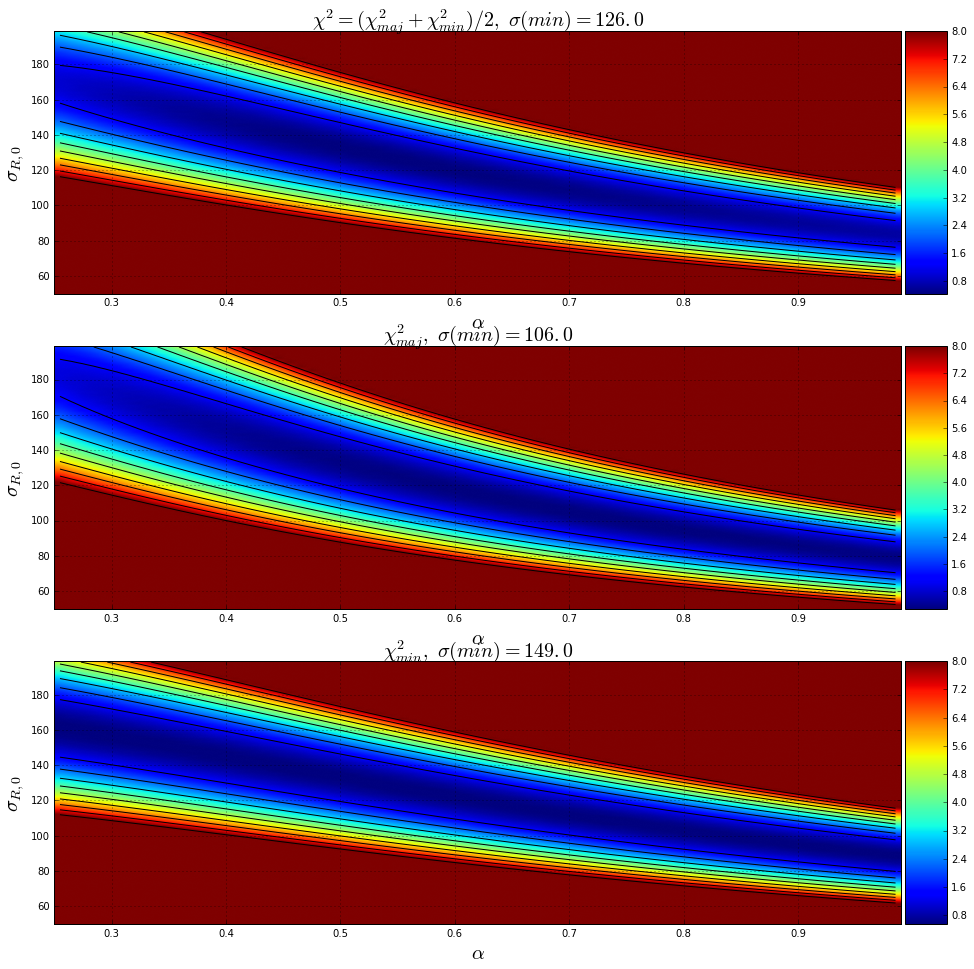

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

def plot_chi2_map(image, ax, log_scale=False, title='$\chi^2$', is_contour=False, vmax=0.):
    if image is not None:
        if log_scale:
            image_log = np.apply_along_axis(np.log, 1, image)
            vmax = image_log.max()
        else:
            image_log = image
        if is_contour:
            norm = cm.colors.Normalize(vmax=image.max(), vmin=-image.max())
            cmap = cm.PRGn
            levels = np.linspace(start=image_log.min(), stop=vmax, num=10)
            cset=ax.contour(image_log, levels, hold='on', colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
        im = ax.imshow(image_log, cmap='jet', vmin=image_log.min(), vmax=vmax, interpolation='spline16', 
                   origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        min_sigma = sigmas[int(np.where(image == image.min())[0])]        
        ax.set_title(title + '$,\ \sigma(min)=%s$' % min_sigma, size=20.)
        ax.set_ylabel('$\sigma_{R,0}$', size=20.)
        ax.set_xlabel(r'$\alpha$', size=20.)
        ax.grid(True)
 
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=[16,16])
plot_chi2_map(image, axes[0], log_scale=False, title='$\chi^2 = (\chi^2_{maj} + \chi^2_{min})/2$', is_contour=True, vmax=8.)
plot_chi2_map(image_maj, axes[1], log_scale=False, title='$\chi^2_{maj}$', is_contour=True, vmax=8.)
plot_chi2_map(image_min, axes[2], log_scale=False, title='$\chi^2_{min}$', is_contour=True, vmax=8.)
plt.show()

In [18]:
tex_vkr_dir = 'C:\\Users\\root\\Dropbox\\RotationCurves\\PhD\\VKR\\imgs\\'
tex_imgs_dir = "C:\\Users\\root\\Dropbox\\RotationCurves\\PhD\\paper1\\text\\imgs\\"

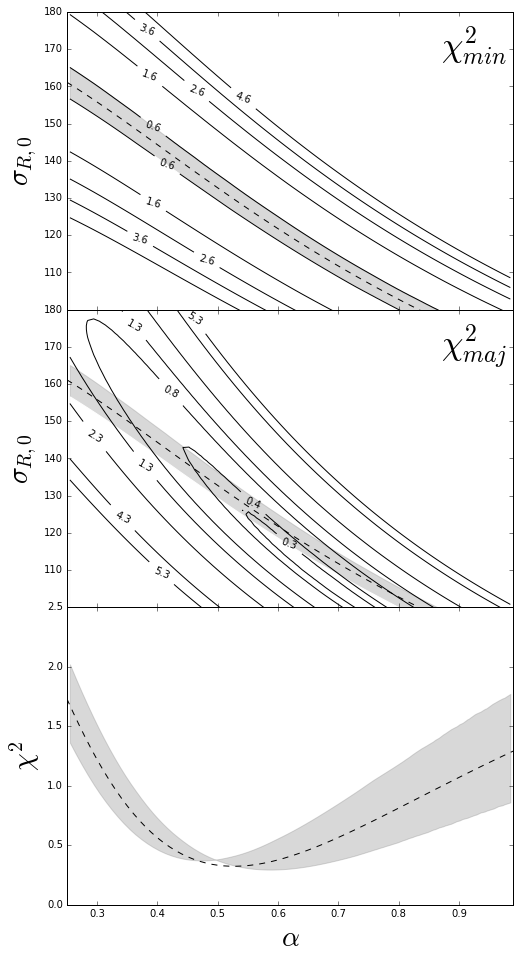

In [19]:
cos_i, sin_i = cos(incl * pi / 180), sin(incl * pi / 180)
main_slice = lambda l: sig_min_0/sqrt(sin_i**2 + cos_i**2 * l**2)


import matplotlib.mlab as mlab
import matplotlib

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=[8,16])
ax = axes[0]
levels = np.linspace(start=image_min.min()*1.1, stop=image_min.min()*1.1+4, num=5)
cset=ax.contour(image_min, levels,  colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
min_map_gutter = cset.collections[0].get_paths()

v1,v2 = min_map_gutter[1].vertices, min_map_gutter[0].vertices
x1,x2 = v1[:,0], v2[:,0]
y1,y2 = v1[:,1], v2[:,1]
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
ax.text(0.87, 168, '$\chi^2_{min}$', size = 34.)
ax.set_ylabel('$\sigma_{R,0}$', size=28.)
xx = np.arange(0.25, 1.0, 0.01)
ax.plot(xx, map(main_slice, xx), '--', color='black')
ax.set_ylim(100, 180)


min_sigmas = np.where(image_min < image_min.min() + 0.03)
slice_alph, slice_sig = min_sigmas[1], min_sigmas[0]
slice_alph = map(lambda l: alphas[0] + (alphas[-1] - alphas[0])*l/len(image_min[0]) , slice_alph)
slice_sig = map(lambda l: sigmas[0] + (sigmas[-1] - sigmas[0])*l/len(image_min), slice_sig)
# ax.plot(slice_alph, slice_sig, '.', color='pink')
poly_slice = poly1d(polyfit(slice_alph, slice_sig, deg=3))
# ax.plot(xx, poly_slice(xx), '.-', color='black')
ax.fill_between(x1, y1, 0, color='gray', alpha=0.3)
ax.fill_between(x2, y2, 0, color='white')

ax = axes[1]
# levels = np.append(np.linspace(start=image_maj.min()+0.1, stop=image_maj.min()+4.1, num=6), np.array([image_maj.min()+0.25]))
# levels = np.linspace(start=image_maj.min()*1.1, stop=image_maj.min()*1.1+5, num=6)
levels = np.array([0.31, 0.39, 0.8, 1.3, 2.3, 4.3, 5.3])
cset=ax.contour(image_maj, levels, hold='on', colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
ax.text(0.87, 168, '$\chi^2_{maj}$', size = 34.)
ax.set_ylabel('$\sigma_{R,0}$', size=28.)
xx = np.arange(0.25, 1.0, 0.01)
ax.plot(xx, map(main_slice, xx), '--', color='black')

ax.fill_between(x1, y1, 0, color='gray', alpha=0.3)
ax.fill_between(x2, y2, 0, color='white')
ax.set_ylim(100, 180)

ax = axes[2]
err_maj = []
for al in alphas:
    global alpha, sig_R_0
    alpha = al
    sig_R_0 = main_slice(al)
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj.append(sqerr_maj)
ax.plot(alphas, err_maj, '--', color='black')
err_maj1 = []
for pa in zip(x2,y2):
    global alpha, sig_R_0
    alpha = pa[0]
    sig_R_0 = pa[1]
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj1.append(sqerr_maj)
# ax.plot(x2, err_maj1, '-', color='black')
err_maj2 = []
for pa in zip(x1,y1):
    global alpha, sig_R_0
    alpha = pa[0]
    sig_R_0 = pa[1]
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj2.append(sqerr_maj)
# ax.plot(x1, err_maj2, '-', color='black')
ax.set_ylabel(r'$\chi^2$', size=28.)
ax.set_xlabel(r'$\alpha$', size=28.)


import scipy.interpolate as sp
f1 = sp.interp1d(x2, err_maj1, kind='linear')
# ax.fill_between(x1, map(f1, x1), err_maj2, color='grey', alpha=0.3)
f2 = sp.interp1d(x1, err_maj2, kind='linear')
ax.fill_between(x2, map(f2, x2), err_maj1, color='grey', alpha=0.3)

ax.set_ylabel(r'$\chi^2$', size=28.)
ax.set_xlabel(r'$\alpha$', size=28.)

# ax.set_ylim(3., 3.8)


fig.subplots_adjust(hspace=0.)
axes[0].yaxis.get_major_ticks()[0].set_visible(False)
axes[1].yaxis.get_major_ticks()[0].set_visible(False)
ax.set_xlim(0.25, 0.99)

# plt.savefig('ngc1068_maps.eps', format='eps')
plt.savefig(tex_vkr_dir+'ngc1068_maps_large.png', format='png', bbox_inches='tight')
# plt.savefig('ngc1068_maps.pdf', format='pdf', dpi=150)

plt.show()

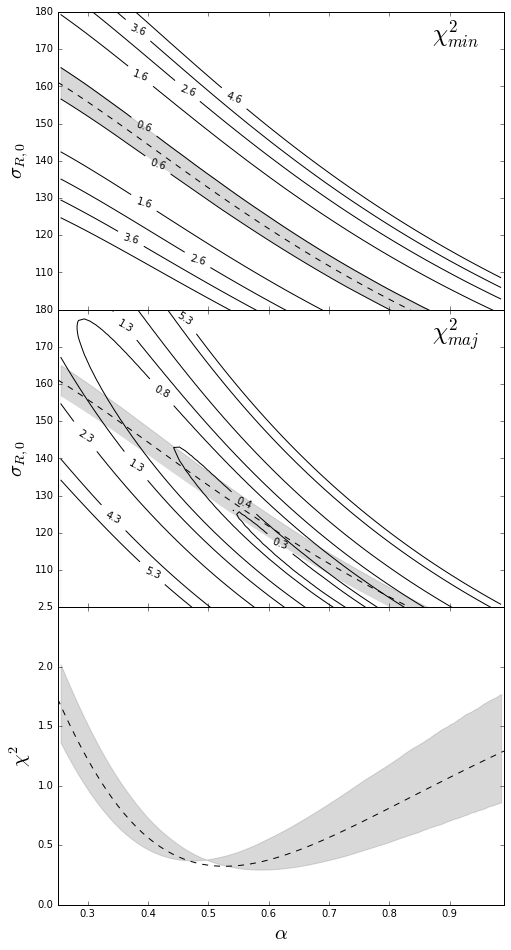

In [20]:
cos_i, sin_i = cos(incl * pi / 180), sin(incl * pi / 180)
main_slice = lambda l: sig_min_0/sqrt(sin_i**2 + cos_i**2 * l**2)


import matplotlib.mlab as mlab
import matplotlib

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=[8,16])
ax = axes[0]
levels = np.linspace(start=image_min.min()*1.1, stop=image_min.min()*1.1+4, num=5)
cset=ax.contour(image_min, levels,  colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
min_map_gutter = cset.collections[0].get_paths()

v1,v2 = min_map_gutter[1].vertices, min_map_gutter[0].vertices
x1,x2 = v1[:,0], v2[:,0]
y1,y2 = v1[:,1], v2[:,1]
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
ax.text(0.87, 172, '$\chi^2_{min}$', size = 24.)
ax.set_ylabel('$\sigma_{R,0}$', size=20.)
xx = np.arange(0.25, 1.0, 0.01)
ax.plot(xx, map(main_slice, xx), '--', color='black')
ax.set_ylim(100, 180)


min_sigmas = np.where(image_min < image_min.min() + 0.03)
slice_alph, slice_sig = min_sigmas[1], min_sigmas[0]
slice_alph = map(lambda l: alphas[0] + (alphas[-1] - alphas[0])*l/len(image_min[0]) , slice_alph)
slice_sig = map(lambda l: sigmas[0] + (sigmas[-1] - sigmas[0])*l/len(image_min), slice_sig)
# ax.plot(slice_alph, slice_sig, '.', color='pink')
poly_slice = poly1d(polyfit(slice_alph, slice_sig, deg=3))
# ax.plot(xx, poly_slice(xx), '.-', color='black')
ax.fill_between(x1, y1, 0, color='gray', alpha=0.3)
ax.fill_between(x2, y2, 0, color='white')

ax = axes[1]
# levels = np.append(np.linspace(start=image_maj.min()+0.1, stop=image_maj.min()+4.1, num=6), np.array([image_maj.min()+0.25]))
# levels = np.linspace(start=image_maj.min()*1.1, stop=image_maj.min()*1.1+5, num=6)
levels = np.array([0.31, 0.39, 0.8, 1.3, 2.3, 4.3, 5.3])
cset=ax.contour(image_maj, levels, hold='on', colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
ax.text(0.87, 172, '$\chi^2_{maj}$', size = 24.)
ax.set_ylabel('$\sigma_{R,0}$', size=20.)
xx = np.arange(0.25, 1.0, 0.01)
ax.plot(xx, map(main_slice, xx), '--', color='black')

ax.fill_between(x1, y1, 0, color='gray', alpha=0.3)
ax.fill_between(x2, y2, 0, color='white')
ax.set_ylim(100, 180)

ax = axes[2]
err_maj = []
for al in alphas:
    global alpha, sig_R_0
    alpha = al
    sig_R_0 = main_slice(al)
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj.append(sqerr_maj)
ax.plot(alphas, err_maj, '--', color='black')
err_maj1 = []
for pa in zip(x2,y2):
    global alpha, sig_R_0
    alpha = pa[0]
    sig_R_0 = pa[1]
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj1.append(sqerr_maj)
# ax.plot(x2, err_maj1, '-', color='black')
err_maj2 = []
for pa in zip(x1,y1):
    global alpha, sig_R_0
    alpha = pa[0]
    sig_R_0 = pa[1]
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj2.append(sqerr_maj)
# ax.plot(x1, err_maj2, '-', color='black')
ax.set_ylabel(r'$\chi^2$', size=20.)
ax.set_xlabel(r'$\alpha$', size=20.)


import scipy.interpolate as sp
f1 = sp.interp1d(x2, err_maj1, kind='linear')
# ax.fill_between(x1, map(f1, x1), err_maj2, color='grey', alpha=0.3)
f2 = sp.interp1d(x1, err_maj2, kind='linear')
ax.fill_between(x2, map(f2, x2), err_maj1, color='grey', alpha=0.3)

ax.set_ylabel(r'$\chi^2$', size=20.)
ax.set_xlabel(r'$\alpha$', size=20.)

# ax.set_ylim(3., 3.8)


fig.subplots_adjust(hspace=0.)
axes[0].yaxis.get_major_ticks()[0].set_visible(False)
axes[1].yaxis.get_major_ticks()[0].set_visible(False)
ax.set_xlim(0.25, 0.99)

plt.savefig(tex_imgs_dir+'ngc1068_maps.eps', format='eps', bbox_inches='tight')
plt.savefig(tex_imgs_dir+'ngc1068_maps.png', format='png', bbox_inches='tight')
plt.savefig(tex_imgs_dir+'ngc1068_maps.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

In [19]:
import scipy.optimize as opt

def chisqfunc((x_sig, x_alpha)):
    global sig_R_0, alpha
    sig_R_0 = x_sig
    alpha = x_alpha
    sqerr_ma = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(l) for l in radii_maj])
    sqerr_mi = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(l) for l in radii_min])
#     print 'chisqf ', sqerr_mi*len(sig_min_p), sqerr_ma*len(sig_maj_p)
    chisq = (sqerr_mi*len(sig_min_p) + sqerr_ma*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p) - 2)
    return chisq

x0 = np.array([130., 0.7])

res = opt.minimize(chisqfunc, x0, bounds=[(sigmas[0], sigmas[-1]), (alphas[0], alphas[-1])], method='L-BFGS-B')
print res

      fun: 0.49383248713523931
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  8.88178420e-08,   6.06181771e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 66
      nit: 20
   status: 0
  success: True
        x: array([ 127.61442501,    0.53903475])


In [20]:
res.hess_inv(res.x)

array([ 372738.09452723,   -2754.28892606])

In [21]:
def gen_next_normal(radii, sig, esig):
    randomDelta =  np.array([np.random.normal(0., derr/2, 1)[0] for derr in esig] ) 
    randomdataY = sig + randomDelta
    return zip(radii, randomdataY)

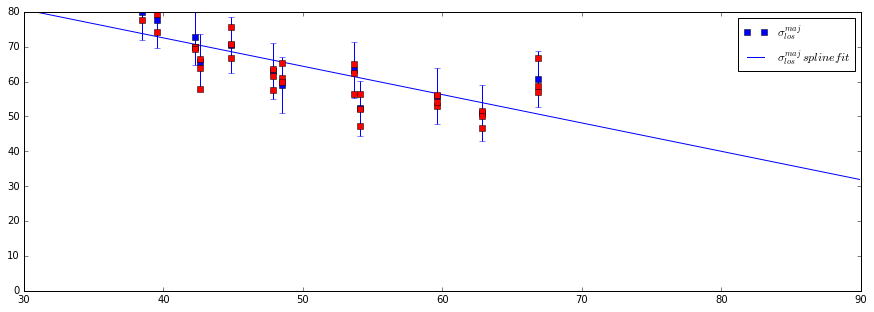

In [22]:
poly_sig_maj = spl_maj
poly_sig_min = spl_min

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='blue')
 
for i in range(3):
    r, s = zip(*gen_next_normal(radii_maj, sig_maj_p, e_sig_maj_p))
    plt.plot(r, s, 's', color='red')

plt.ylim(0., 80.)
plt.legend()
plt.show()

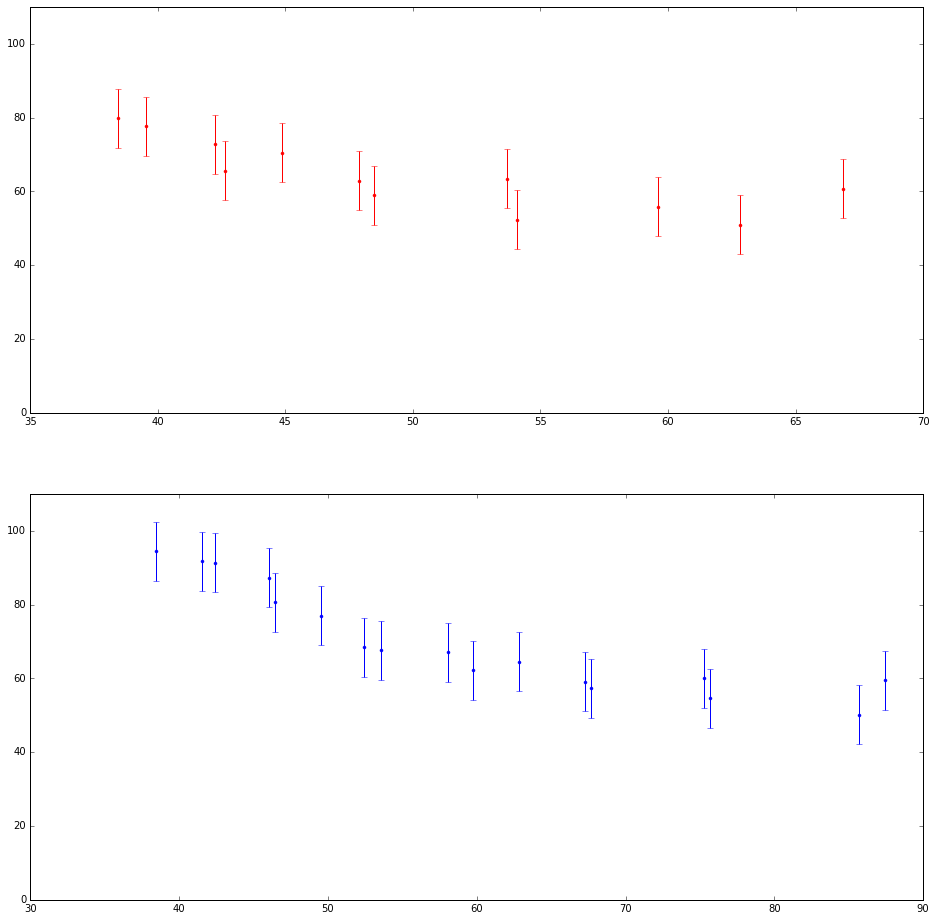

In [23]:
import time
os.chdir("C:\\science\\2FInstability\\data\\ngc1068")

N = 10000

result = []
start_time = time.time()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

radii_maj1, sig_maj_p1, e_sig_maj_p1 = radii_maj, sig_maj_p, e_sig_maj_p
radii_min1, sig_min_p1, e_sig_min_p1 = radii_min, sig_min_p, e_sig_min_p

if not os.path.exists(pics_path):
    os.makedirs(pics_path)
if os.path.isfile(pics_path + 'monte_carlo.npy'):
    result = np.load(pics_path + "monte_carlo.npy")
else:
    for i in log_progress(range(N)):
        global spl_maj, spl_min
        global radii_min, radii_maj, sig_min_p, sig_maj_p, sig_min_0
        
        r, s = zip(*gen_next_normal(radii_maj1, sig_maj_p1, e_sig_maj_p1))
        spl_maj = inter.UnivariateSpline(r[1:], s[1:], k=3, s=10000.)
        
        radii_maj, sig_maj_p = r, s
        
        ax1.plot(points, spl_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='blue')
        
        r, s = zip(*gen_next_normal(radii_min1, sig_min_p1, e_sig_min_p1))
        spl_min = inter.UnivariateSpline(r[1:], s[1:], k=3, s=10000.)
        sig_min_0 = spl_min(radii_min[0])
        
        radii_min, sig_min_p = r, s
        
        ax2.plot(points, spl_min(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='red')
        
        res = opt.minimize(chisqfunc, x0, bounds=[(sigmas[0], sigmas[-1]), (alphas[0], alphas[-1])], method='L-BFGS-B')
#         print res.fun
        result.append(res.x)
    np.save(pics_path + 'monte_carlo', np.array(result))
    print("--- %s seconds ---" % (time.time() - start_time))
    
ax1.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='red')
ax2.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='o', marker='.', color='blue')    
ax1.set_ylim(0., 110.)
ax2.set_ylim(0., 110.)
plt.show()


radii_maj, sig_maj_p, e_sig_maj_p = radii_maj1, sig_maj_p1, e_sig_maj_p1
radii_min, sig_min_p, e_sig_min_p = radii_min1, sig_min_p1, e_sig_min_p1

In [24]:
len(result)

10000

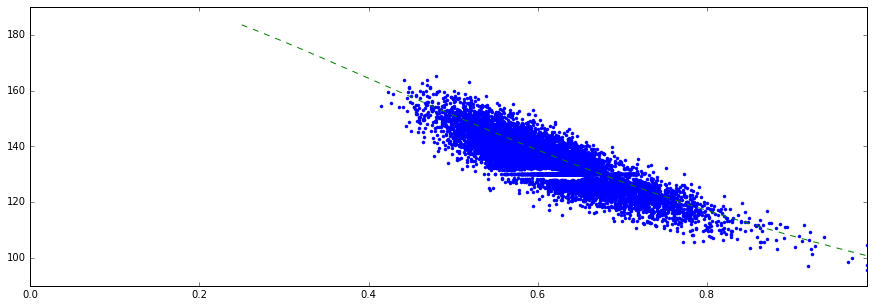

In [25]:
sig_min_0 = 100 #???

s,a = zip(*result)
plt.plot(a, s, '.')
plt.plot(alphas, map(main_slice, alphas), '--')
plt.xlim(0.0, 0.99)
# plt.ylim(100, 140)
plt.show()

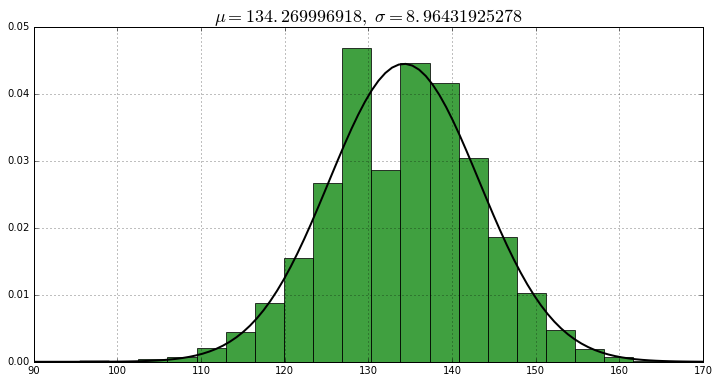

In [26]:
from scipy.stats import norm

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(s, 20, normed=1, facecolor='green', alpha=0.75)
mu, std = norm.fit(s)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title('$\mu=%s,\ \sigma=%s$' % (mu, std), fontsize=18)
ax.grid(True)

plt.show()

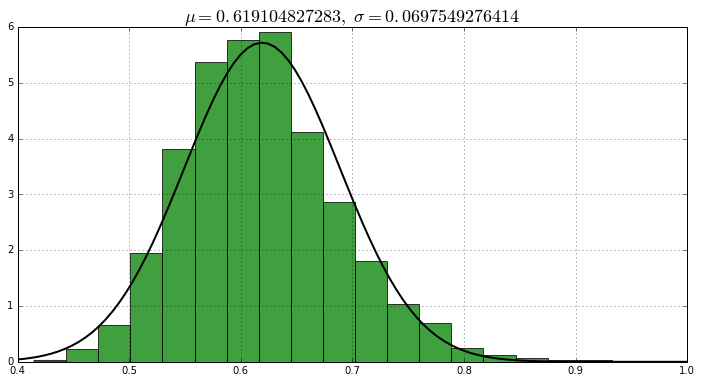

In [27]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(a, 20, normed=1, facecolor='green', alpha=0.75)
mu, std = norm.fit(a)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title('$\mu=%s,\ \sigma=%s$' % (mu, std), fontsize=18)
ax.grid(True)

plt.show()

NLLC Marquardt-Levenberg

In [28]:
def calc_chi2_normal(obs, obserr, predicted):
    return sum([(o-p)**2/err**2 for (o,p,err) in zip(obs, predicted, obserr)])/len(obs)

def chisqfunc1((x_sig, x_alpha)):
    global sig_R_0, alpha
    sig_R_0 = x_sig
    alpha = x_alpha
    sqerr_ma = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    return sqerr_ma

def chisqfunc2((x_sig, x_alpha)):
    global sig_R_0, alpha
    sig_R_0 = x_sig
    alpha = x_alpha
    sqerr_mi = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min])
    return sqerr_mi

def func((x_sig, x_alpha)):
    return [chisqfunc1((x_sig, x_alpha)), chisqfunc2((x_sig, x_alpha))]

In [29]:
res = opt.root(func, [110., 0.5], method='lm')
res

   cov_x: None
    fjac: array([[ -1.27307579e+00,   1.26068799e-03],
       [ -1.01349864e-02,  -1.59739625e-05]])
     fun: array([ 0.31736946,  0.56039626])
    ipvt: array([2, 1])
 message: 'Number of calls to function has reached maxfev = 600.'
    nfev: 602
     qtf: array([ -5.65242576e-04,  -6.44024100e-01])
  status: 5
 success: False
       x: array([ 145.84029729,    0.53645172])

In [30]:
# np.dot(res.cov_x, res.fun)

In [31]:
# s_sq = (np.array(func(res.x))**2).sum()/(len(sig_maj_p)+len(sig_min_p)-2)
# pcov = res.cov_x * s_sq
# pcov

In [32]:
x, cox = opt.leastsq(func, [110., 0.5])
x, cox

C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


(array([ 145.84029729,    0.53645172]), 5)

In [33]:
def func(x, a, b, c):
    return [a * np.exp(l) if l > 2.0 else b*l+c for l in x]
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)


In [34]:
popt, pcov = opt.curve_fit(func, xdata, y)
popt, pcov

(array([ 2.5,  1.3,  0.5]), array([[ 0.,  0., -0.],
        [ 0.,  0., -0.],
        [ 0., -0.,  0.]]))

In [35]:
min_n = len(radii_maj)

def func(x, alph, sig):
    global alpha, sig_R_0
    alpha = alph
    sig_R_0 = sig
    return [sig_min_exp(x[l]) if l > min_n else sig_maj_exp(x[l]) for l in range(len(x))]

In [36]:
rr = radii_maj + radii_min
print len(rr), min_n
sgs = sig_maj_p + sig_min_p
esgs = e_sig_maj_p + e_sig_min_p
esgs = [l/2 for l in esgs]

29 12


In [37]:
sig_min_0 = spl_min(radii_min[0])
popt, pcov = opt.curve_fit(func, rr, sgs, sigma=esgs, absolute_sigma=True, p0=[0.6, 150.])
print popt, pcov

s_sq = np.array([((np.array(func(rr, popt[0], popt[1]))-np.array(sgs))**2)[l]/esgs[l]**2 for l 
                 in range(len(rr))]).sum()/(len(rr)-2)
pcov1 = pcov * s_sq
for i in range(len(pcov)):
    print sqrt(pcov1[i][i])

[   0.55430872  126.09752317] [[  3.03967052e-03  -3.85214005e-01]
 [ -3.85214005e-01   5.06802568e+01]]
0.0830423239513
10.7227367117


In [38]:
def err_pcov(popt, pcov):
#     s_sq = np.array([((np.array(func(rr, popt[0], popt[1]))-np.array(sgs))**2)[l]
#                      /esgs[l]**2 for l in range(len(rr))]).sum()/(len(rr)-2)
#     pcov1 = pcov * s_sq
#     return (sqrt(pcov1[0][0]), sqrt(pcov1[1][1]))
    return np.sqrt(np.diag(pcov))

-------------------

In [39]:
print sig_min_0, sin_i, cos_i, radii_maj[-1]

87.7915256339 0.5 0.866025403784 66.8473895582


In [40]:
# r, s = zip(*gen_next_normal(radii_maj, sig_maj_p, e_sig_maj_p))
# r1, s1 = zip(*gen_next_normal(radii_min, sig_min_p, e_sig_min_p))
# rr = r + r1
# sgs = s + s1

# spl_min = inter.UnivariateSpline(r1[1:], s1[1:], k=3, s=10000.)
# sig_min_0 = spl_min(radii_min[0])

In [41]:
popt, pcov = opt.curve_fit(func, rr, sgs, sigma=e_sig_maj_p+e_sig_min_p, absolute_sigma=True, p0=[0.6, 150.])

err = err_pcov(popt, pcov)
print popt
print err[0], err[1], sig_min_0
print np.sqrt(np.diag(pcov))

[   0.55430872  126.09752317]
0.110266414095 14.2380134638 87.7915256339
[  0.11026641  14.23801346]


In [42]:
test_points = np.linspace(min(radii_min), max(radii_min), 1000)

fh = open('spl_sig_dt.txt', 'w+')
for t in test_points:
    s = '{:2.3f}\t{:3.3f}\t{:2.3f}\n'.format(t, float(spl_min(t)), sigPhi_to_sigR_real(t))
    fh.write(s)
fh.close()


rr_shifted = [rr[l] if l < len(sig_maj_p) else rr[l] + radii_maj[-1] + 1 for l in range(len(rr))]

fh = open('sig_dt.txt', 'w+')
for t in range(len(rr)):
    s = '{:2.3f}\t{:3.3f}\t{:2.3f}\n'.format(rr_shifted[t], sgs[t], esgs[t])
    fh.write(s)
fh.close()

-----------------------

In [43]:
import time
os.chdir("C:\\science\\2FInstability\\data\\ngc1068")

N = 10000

result1 = []
start_time = time.time()

for i in log_progress(range(N)):
    global spl_maj, spl_min
    global radii_min, radii_maj, sig_min_p, sig_maj_p, sig_min_0
    global alpha, sig_R_0
    r, s = zip(*gen_next_normal(radii_maj, sig_maj_p, e_sig_maj_p))
    r1, s1 = zip(*gen_next_normal(radii_min, sig_min_p, e_sig_min_p))
    rr = r + r1
    sgs = s + s1
    
    spl_min = inter.UnivariateSpline(r1[1:], s1[1:], k=3, s=10000.)
    sig_min_0 = spl_min(radii_min[0])
    
    
#     popt, pcov = opt.curve_fit(func, radii_maj+radii_min, sig_maj_p+sig_min_p, 
#                                sigma=e_sig_maj_p+e_sig_min_p, absolute_sigma=True)
    popt, pcov = opt.curve_fit(func, rr, sgs, sigma=e_sig_maj_p+e_sig_min_p, absolute_sigma=True, p0=[0.6, 150.])

    err = err_pcov(popt, pcov)
#     print err[0], err[1]
    result1.append((popt[0], popt[1], err[0], err[1]))
print("--- %s seconds ---" % (time.time() - start_time))

--- 137.556999922 seconds ---


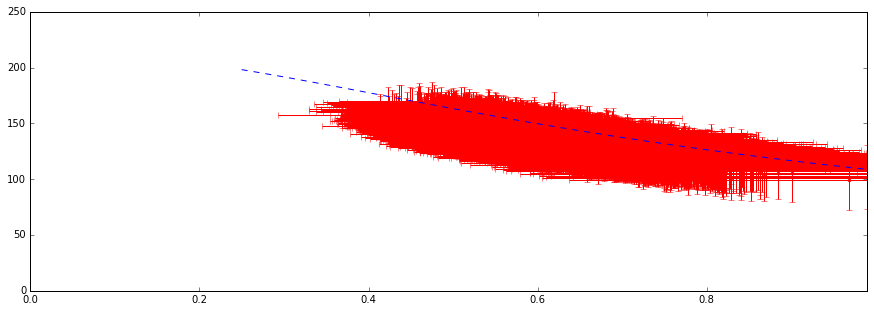

In [44]:
a,s,erra,errs = zip(*result1)
# a,s = np.array(a), np.array(s)
# plt.plot(a, s, '.')
plt.errorbar(a, s, yerr=errs, xerr=erra, fmt='o', marker='.', color='red')
plt.plot(alphas, map(main_slice, alphas), '--')
plt.xlim(0.0, 0.99)
plt.ylim(0, 250)
plt.show()

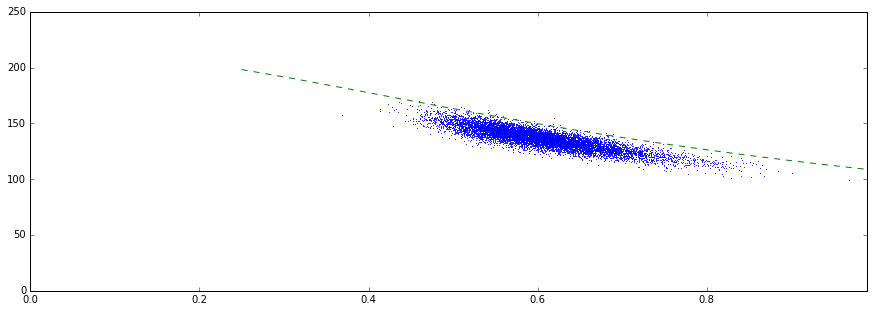

In [45]:
a,s,erra,errs = zip(*result1)
plt.plot(a, s, '.', ms=1)
# plt.errorbar(a, s, yerr=errs, xerr=erra, fmt='o', marker='.', color='red')
plt.plot(alphas, map(main_slice, alphas), '--')
plt.xlim(0.0, 0.99)
plt.ylim(0, 250)
plt.show()

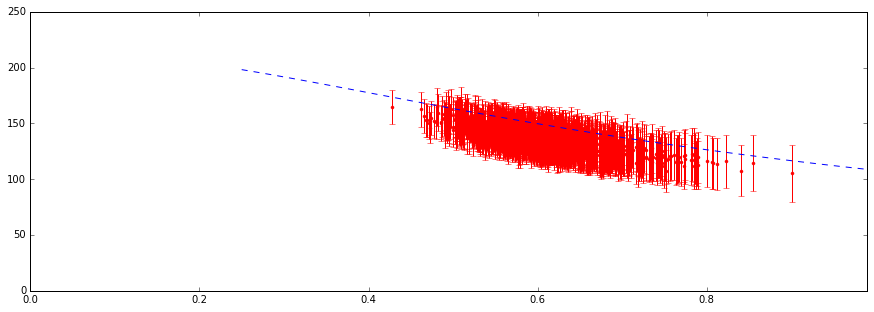

In [46]:
plt.errorbar(a[::10], s[::10], yerr=errs[::10], fmt='o', marker='.', color='red')
plt.plot(alphas, map(main_slice, alphas), '--')
plt.xlim(0.0, 0.99)
plt.ylim(0, 250)
plt.show()

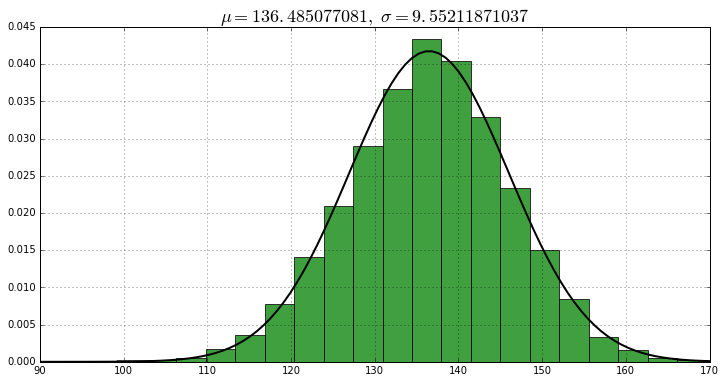

In [47]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(s, 20, normed=1, facecolor='green', alpha=0.75)
mu, std = norm.fit(s)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title('$\mu=%s,\ \sigma=%s$' % (mu, std), fontsize=18)
ax.grid(True)

plt.show()

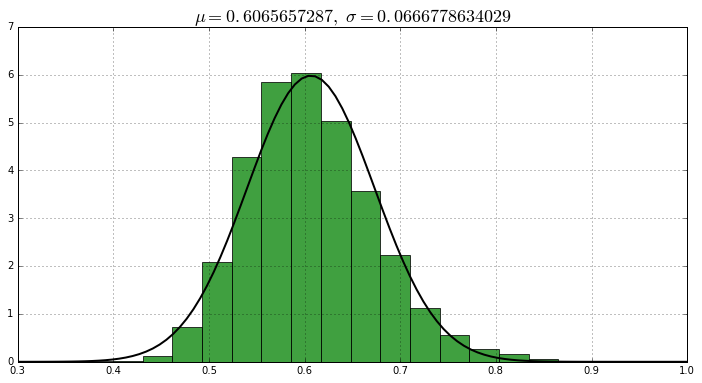

In [48]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(a, 20, normed=1, facecolor='green', alpha=0.75)
mu, std = norm.fit(a)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title('$\mu=%s,\ \sigma=%s$' % (mu, std), fontsize=18)
ax.grid(True)

plt.show()

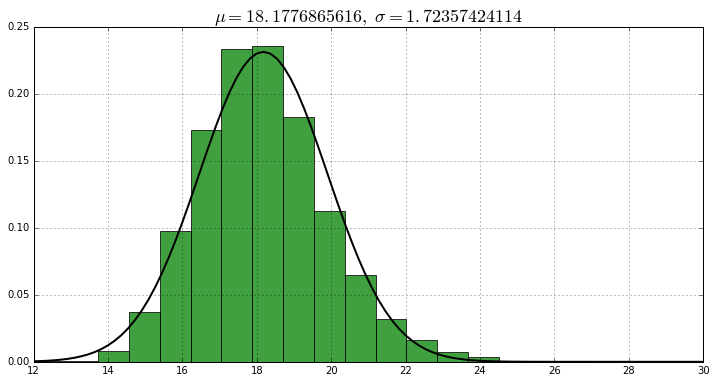

In [49]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(errs, 20, normed=1, facecolor='green', alpha=0.75)
mu, std = norm.fit(errs)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title('$\mu=%s,\ \sigma=%s$' % (mu, std), fontsize=18)
ax.grid(True)

plt.show()

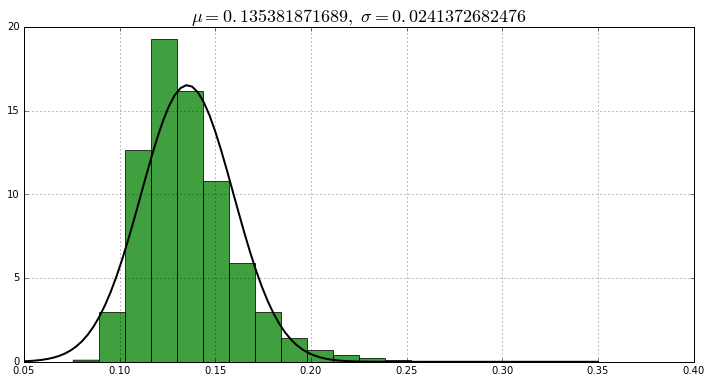

In [50]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(erra, 20, normed=1, facecolor='green', alpha=0.75)
mu, std = norm.fit(erra)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title('$\mu=%s,\ \sigma=%s$' % (mu, std), fontsize=18)
ax.grid(True)

plt.show()

In [51]:
# def chi_last(r, s, es, alph, sig):
#     df = func(r, alph, sig)-np.array(s)
#     qf = [df[l]/es[l] for l in range(len(r))]
#     qf = [l**2 for l in qf]
#     print sum(qf[min_n:]), sum(qf[:min_n]) 
#     return sum(qf)/(len(r)-2)

# N = 2
# for i in range(N):
#     global spl_maj, spl_min
#     global alpha, sig_R_0
#     r, s = zip(*gen_next_normal(radii_maj, sig_maj_p, e_sig_maj_p))
#     spl_maj = inter.UnivariateSpline(r[1:], s[1:], k=3, s=10000.)
#     r1, s1 = zip(*gen_next_normal(radii_min, sig_min_p, e_sig_min_p))
#     spl_min = inter.UnivariateSpline(r1[1:], s1[1:], k=3, s=10000.)
    
#     global sig_min_0
#     sig_min_0 = spl_min(radii_min[0])
    
#     rr = r + r1
#     sgs = s + s1
#     res = opt.minimize(chisqfunc, x0, bounds=[(sigmas[0], sigmas[-1]), (alphas[0], alphas[-1])], method='L-BFGS-B')
#     popt, pcov = opt.curve_fit(func, rr, sgs, sigma=esgs, absolute_sigma=True)
#     print res.x, popt
# #     print chisqfunc(res.x), chisqfunc((popt[1], popt[0]))
#     s_fs = np.array([((np.array(func(rr, res.x[1], res.x[0]))-np.array(sgs))**2)[l]
#                      /esgs[l]**2 for l in range(len(rr))]).sum()/(len(rr)-2)
#     s_ps = np.array([((np.array(func(rr, popt[0], popt[1]))-np.array(sgs))**2)[l]
#                      /esgs[l]**2 for l in range(len(rr))]).sum()/(len(rr)-2)
#     print s_fs, s_ps
# #     print chisqfunc1(res.x), chisqfunc1((popt[1], popt[0]))
# #     print chisqfunc2(res.x), chisqfunc2((popt[1], popt[0]))
# #     print chi_last(rr, sgs, esgs, res.x[1], res.x[0]), chi_last(rr, sgs, esgs, popt[0], popt[1])
#     alpha = res.x[1]
#     sig_R_0 = res.x[0]
#     sqerr_ma = calc_chi2_normal(s, e_sig_maj_p, [sig_maj_exp(l) for l in r])
#     sqerr_mi = calc_chi2_normal(s1, e_sig_min_p, [sig_min_exp(l) for l in r1])
#     chisqs = (sqerr_mi*len(sig_min_p) + sqerr_ma*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p))
#     print sqerr_ma, sqerr_mi, chisqs
#     alpha = popt[0]
#     sig_R_0 = popt[1]
#     sqerr_ma1 = calc_chi2_normal(s, e_sig_maj_p, [sig_maj_exp(l) for l in r])
#     sqerr_mi1 = calc_chi2_normal(s1, e_sig_min_p, [sig_min_exp(l) for l in r1])
#     chisqs1 = (sqerr_mi1*len(sig_min_p) + sqerr_ma1*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p))
#     vcom = lambda l: 'v' if l[0] > l[1] else '^'
#     print vcom((sqerr_ma,sqerr_ma1)), vcom((sqerr_mi,sqerr_mi1)), vcom((chisqs, chisqs1))
#     print sqerr_ma1, sqerr_mi1, chisqs1
    

#     alpha = res.x[1]
#     sig_R_0 = res.x[0]
#     sqerr_ma = chi_last(r, s, e_sig_maj_p, alpha, sig_R_0)
#     sqerr_mi = chi_last(r1, s1, e_sig_min_p, alpha, sig_R_0)
#     chisqs = (sqerr_mi*len(sig_min_p) + sqerr_ma*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p))
#     print sqerr_ma, sqerr_mi, chisqs
#     alpha = popt[0]
#     sig_R_0 = popt[1]
#     sqerr_ma1 = chi_last(r, s, e_sig_maj_p, alpha, sig_R_0)
#     sqerr_mi1 = chi_last(r1, s1, e_sig_min_p, alpha, sig_R_0)
#     chisqs1 = (sqerr_mi1*len(sig_min_p) + sqerr_ma1*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p))
#     vcom = lambda l: 'v' if l[0] > l[1] else '^'
#     print vcom((sqerr_ma,sqerr_ma1)), vcom((sqerr_mi,sqerr_mi1)), vcom((chisqs, chisqs1))
#     print sqerr_ma1, sqerr_mi1, chisqs1
    
    
#     print '-'*20
# #     print calc_chi2_normal(s, e_sig_maj_p, [sig_maj_exp(l) for l in r])*len(s)/(len(s)-2), chi_last(r, s, e_sig_maj_p, alpha, sig_R_0)
# #     print calc_chi2_normal(s1, e_sig_min_p, [sig_min_exp(l) for l in r1])*len(s1)/(len(s1)-2), chi_last(r1, s1, e_sig_min_p, alpha, sig_R_0)
# #     print func(r, alpha, sig_R_0), [sig_maj_exp(l) for l in r]
#     print chisqfunc((sig_R_0, alpha)), chi_last(radii_maj+radii_min, sig_maj_p+sig_min_p, 
#                                e_sig_maj_p+e_sig_min_p, alpha, sig_R_0)
    

# #     sqerr_ma = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
# #     sqerr_mi = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min])
# #     print 'chisqf ', sqerr_mi*len(sig_min_p) + sqerr_ma*len(sig_maj_p)
# #     chisq = (sqerr_mi*len(sig_min_p) + sqerr_ma*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p) - 2)
    
    
#     print '-'*20

In [52]:
radii_maj, sig_maj_p, e_sig_maj_p = radii_maj1, sig_maj_p1, e_sig_maj_p1
radii_min, sig_min_p, e_sig_min_p = radii_min1, sig_min_p1, e_sig_min_p1

N = 2
for i in range(N):
    global spl_maj, spl_min
    global radii_min, radii_maj, sig_min_p, sig_maj_p
    
    r, s = zip(*gen_next_normal(radii_maj, sig_maj_p, e_sig_maj_p))
    spl_maj = inter.UnivariateSpline(r[1:], s[1:], k=3, s=10000.)
    r1, s1 = zip(*gen_next_normal(radii_min, sig_min_p, e_sig_min_p))
    spl_min = inter.UnivariateSpline(r1[1:], s1[1:], k=3, s=10000.)
    
    global sig_min_0
    sig_min_0 = spl_min(radii_min[0])
    
    radii_maj, sig_maj_p = r, s
    radii_min, sig_min_p = r1, s1
    
    rr = r + r1
    sgs = s + s1
    res = opt.minimize(chisqfunc, x0, bounds=[(sigmas[0], sigmas[-1]), (alphas[0], alphas[-1])], method='L-BFGS-B')
    popt, pcov = opt.curve_fit(func, rr, sgs, sigma=esgs, absolute_sigma=True)
    print res.x, popt

[ 156.18940825    0.50160031] [   0.4779097   160.95915277]
[ 158.70819102    0.46238294] [   0.43494435  164.24470732]


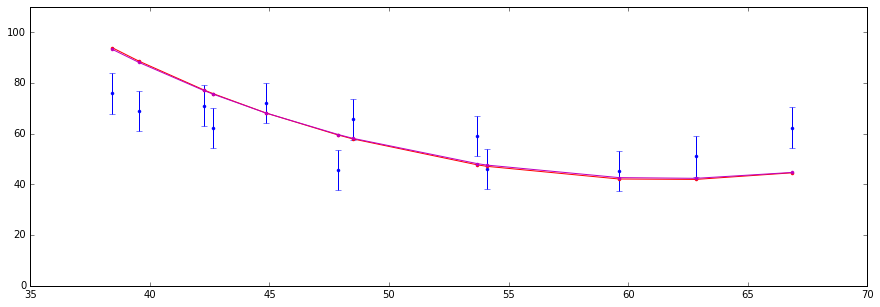

In [53]:
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='blue')
# plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='o', marker='.', color='blue')
plt.plot(rr[:min_n], func(rr, popt[0], popt[1])[:min_n], '.-', color='red')
plt.plot(rr[:min_n], func(rr, res.x[1], res.x[0])[:min_n], '.-', color='m')
plt.ylim(0., 110.)
plt.show()

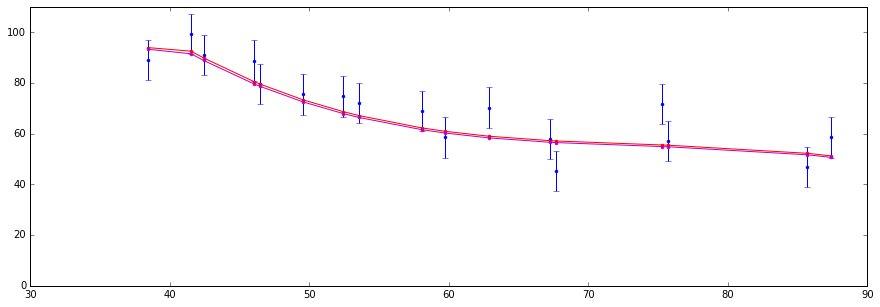

In [54]:
# plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='blue')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='o', marker='.', color='blue')
plt.plot(rr[min_n:], func(rr, popt[0], popt[1])[min_n:], '.-', color='red')
plt.plot(rr[min_n:], func(rr, res.x[1], res.x[0])[min_n:], '.-', color='m')
plt.ylim(0., 110.)
plt.show()

N1_maj=12,	 N2_min=17,	 chi^2_corr[0][0]=36.9468871555 (was 38.3182677763 and 35.0040979426)


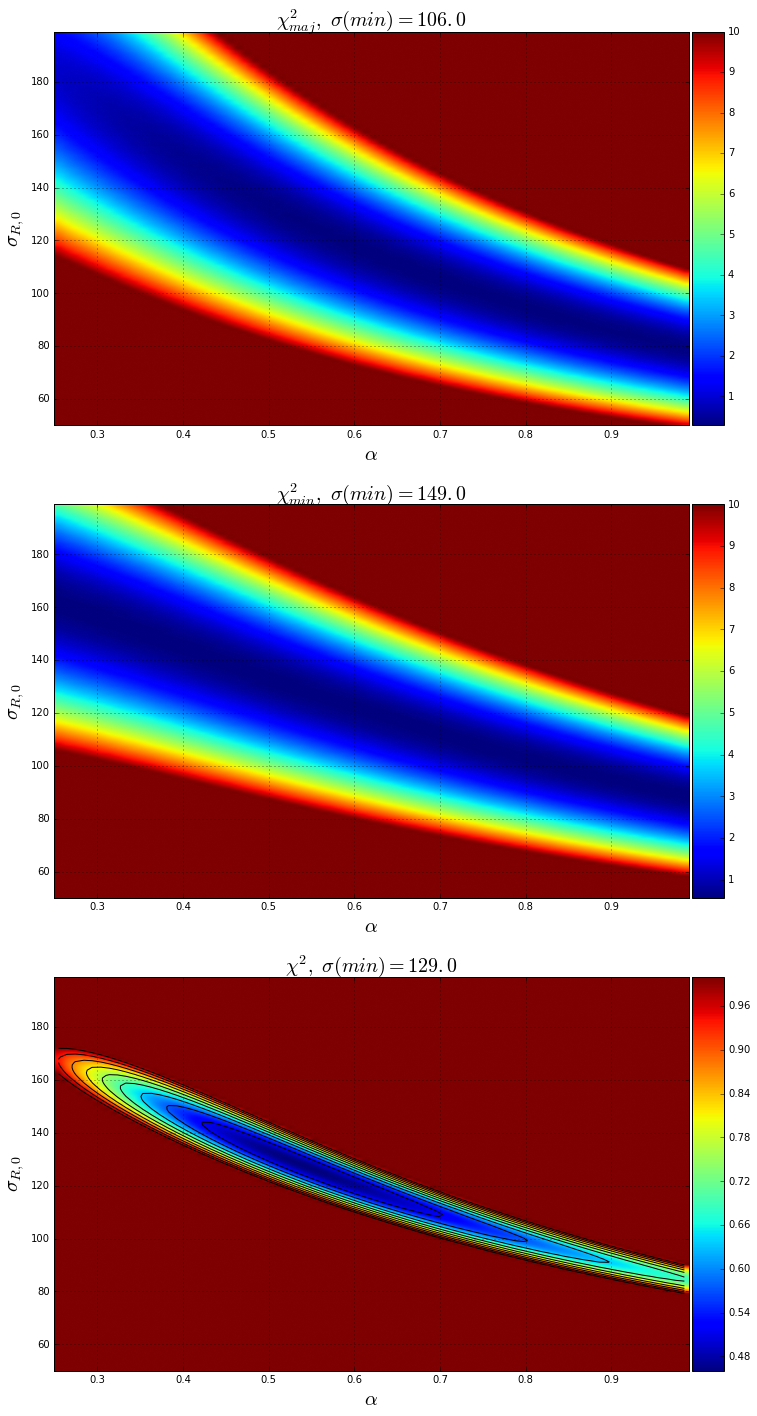

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=[12,24])
plot_chi2_map(image_maj, axes[0], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=10.)
plot_chi2_map(image_min, axes[1], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=10.)
corr_image = (image_min*len(sig_min_p) + image_maj*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p))
print 'N1_maj={},\t N2_min={},\t chi^2_corr[0][0]={} (was {} and {})'.format(len(sig_maj_p), len(sig_min_p), corr_image[0][0], 
                                                                            image_min[0][0], image_maj[0][0])
plot_chi2_map(corr_image, axes[2], log_scale=False, title='$\chi^2$', is_contour=True, vmax=1.)
plt.show()